<a href="https://colab.research.google.com/github/Kiranboddula05/Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The** **Sparks** **Foundation**

*Data* *Science* *and* *Business* *Analytics* (**Grip** **June**-**2021**)

Task 1 : Prediction using Supervised ML.

Problem : Predict the percentage of Students based on number of study hours.

Author: KIRAN KUMAR BODDULA

# 1 . IMPORTING ALL THE LIBRARIES REQUIRED.

In [36]:
#importing libraries
import pandas as pd #for handling dataset
import numpy as np  #for numerical calculations
import matplotlib.pyplot as plt #for graphical visualisation
%matplotlib inline
import seaborn as sns #for data visualisation.


# 2. READING THE DATASET.


In [37]:
#Reading data from link
url = r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [38]:
#printing first 10 rows of the data set.
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#checking the number of rows and columns.
df.shape

(25, 2)

In [40]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
#check if there is any null value in the dataset.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# 3 . DATA VISUALISATION

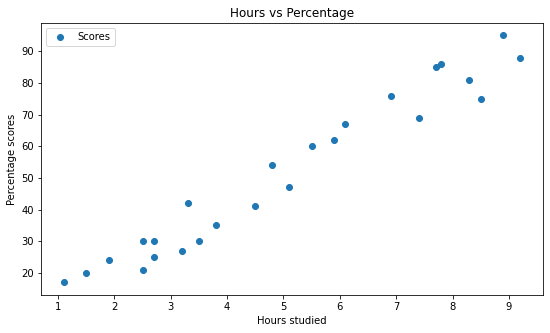

In [46]:
#Plotting the graph to see the relation and distribution of datapoints.
df.plot(x="Hours", y="Scores", figsize = (9,5), style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scores")
plt.show()

#From the above graph we can see that there is a positive linear relation between the number of hours studied and percentage scores

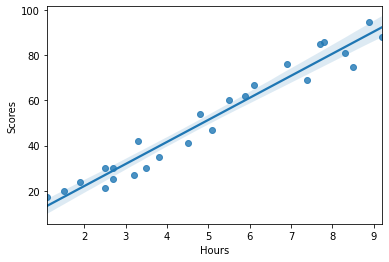

In [48]:
sns.regplot( x = 'Hours', y = 'Scores', data = df)

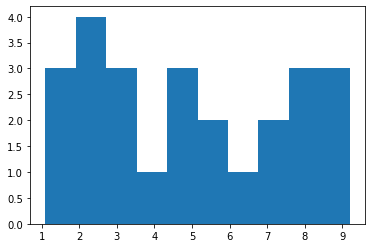

In [14]:
#Distribution of hours data
plt.hist(x = 'Hours', data = df)
plt.show()

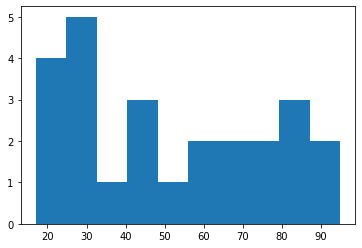

In [25]:
#Distribution of scores data
plt.hist(x = 'Scores', data = df)
plt.show()

# 4 . DATA PREPARATION

In [18]:
#dividing the datasets int attributes(inputs) and labels(columns)
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Split this data into train and testdata using the train_test_split method from the skicit learn library.

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


# 5 . TRAINING THE MODEL.


we have to train our data using Linear regression algorithm and check the values for test data

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
r_line = lr.coef_*x+lr.intercept_

Text(0, 0.5, 'Scores')

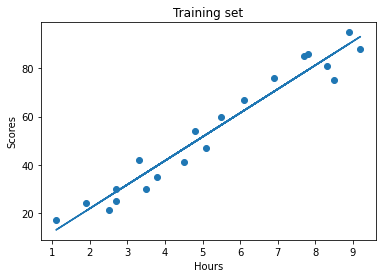

In [37]:
#visualising the training dataset
plt.scatter(x_train, y_train)
plt.title('Training set')
plt.plot(x_train,lr.predict(x_train))
plt.xlabel("Hours")
plt.ylabel("Scores")



# 6 .MAKING PREDICTIONS


we have done training and we have to make some predictions.


In [51]:
y_pred = lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

compare actual values with predicted values

In [53]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [54]:
#score for test data

accuracy = lr.score(x_test, y_test)
print("Accuracy:",accuracy * 100)

Accuracy: 94.54906892105353


**What** **will** **be** **the** **Predicted** **Score** **if** **a** **Student** **studies** **for** **9.35** **hours** **per** **day**

In [56]:
# we can test for any input
# here we are calculating the score for 9.35 hours

hours = [[9.35]]
pred = lr.predict(hours)
pred

array([94.68279814])

According to regression if a student studies for 9.35 hours per day ,the score will be 94.68 

7. **MODEL** **EVALUATION**

In this step we have to evaluate the performance of algorithm.
We can evaluate this calculating Mean Squared Error or Mean Absolute Error. 

*MEAN* *ABSOLUTE* *ERROR*


In [57]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ", MAE)



Mean Absolute Error:  4.183859899002982


*MEAN* *SQUARED* *ERROR*


In [59]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ", MSE)

Mean Squared Error:  21.598769307217456


Small value of Mean Absolute Error states that the model is quite good.


**THANK** **YOU**